# LINEAR REGRESSION.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
data = pd.read_csv('hp_data.csv')
data.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [7]:
#basic checks
data.shape

(3500, 9)

In [8]:
data.isnull().sum()

place         0
built         0
sqft          0
sale          0
yearsOld      0
floor         0
totalFloor    0
bhk           0
price         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place       3500 non-null   object
 1   built       3500 non-null   object
 2   sqft        3500 non-null   int64 
 3   sale        3500 non-null   object
 4   yearsOld    3500 non-null   int64 
 5   floor       3500 non-null   int64 
 6   totalFloor  3500 non-null   int64 
 7   bhk         3500 non-null   int64 
 8   price       3500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 246.2+ KB


In [18]:
data.corr()

,sqft,yearsOld,floor,totalFloor,bhk,price
sqft,1.000000,0.229461,0.356053,0.358946,0.356053,0.778364
yearsOld,0.229461,1.000000,-0.116427,-0.142562,-0.116427,0.215712
floor,0.356053,-0.116427,1.000000,0.958100,1.000000,0.263472
totalFloor,0.358946,-0.142562,0.958100,1.000000,0.958100,0.402256
bhk,0.356053,-0.116427,1.000000,0.958100,1.000000,0.263472
price,0.778364,0.215712,0.263472,0.402256,0.263472,1.000000


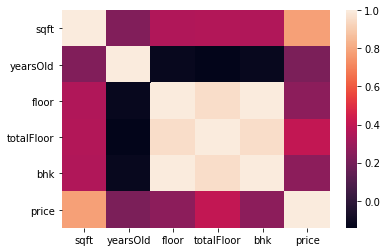

In [19]:
sb.heatmap(data.corr())

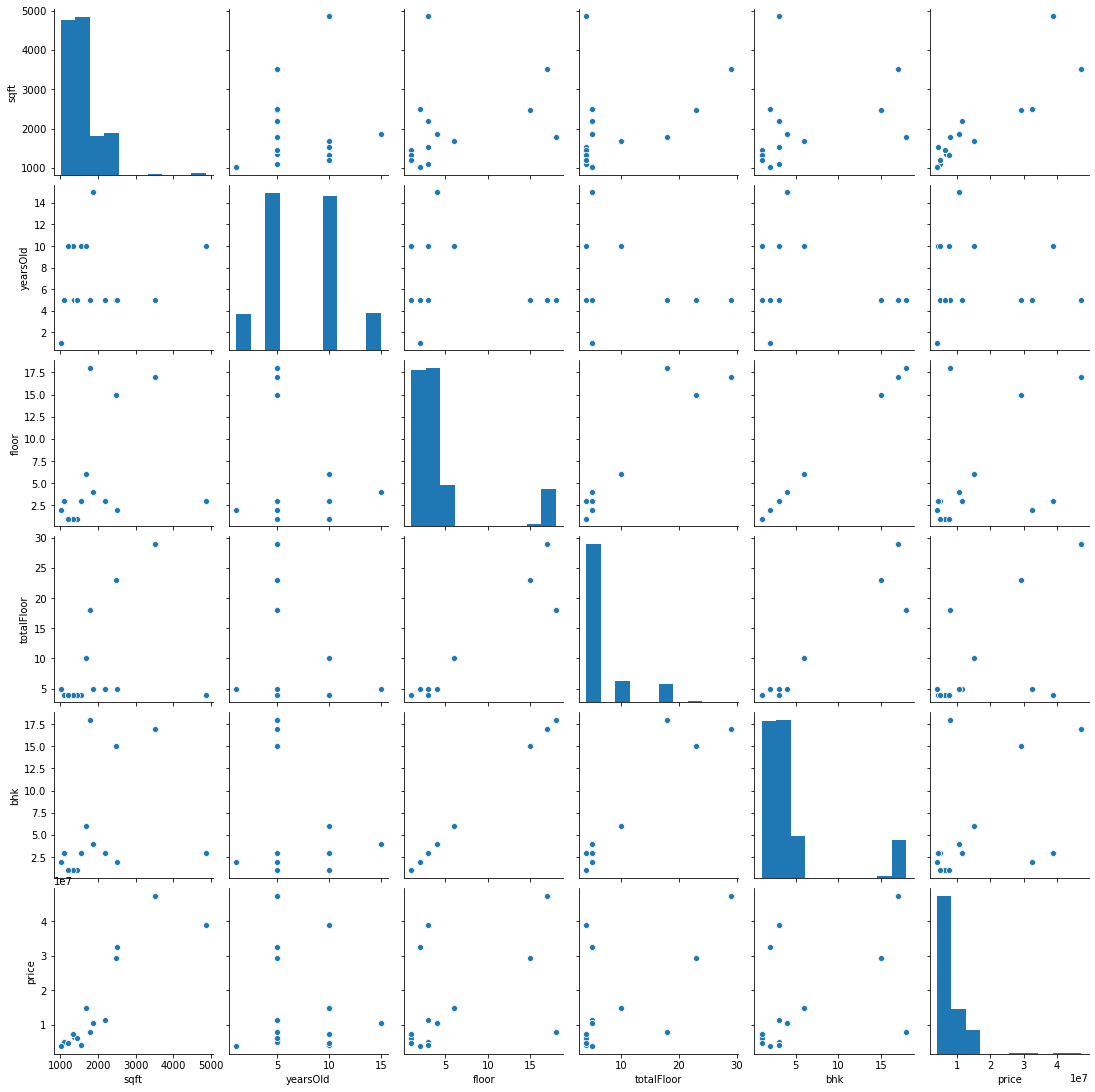

In [20]:
sb.pairplot(data) # creates histograms of all columns

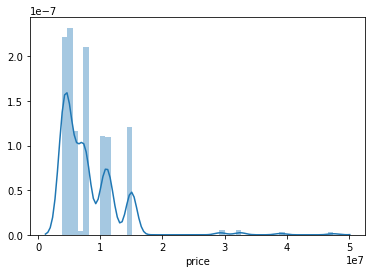

In [21]:
sb.distplot(data['price']) #to check the distribution of target column

In [10]:
# Define X and Y 
X = data.loc[:,['sqft','yearsOld','floor']]
y = data.price

In [11]:
#Train-Test Split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=9)

In [12]:
print("X_train Shape",X_train.shape) #takes 75% of data for training
print("X_test Shape",X_test.shape) # takes 25% of data for testing
print("y_train Shape",y_train.shape) #takes 75% of data for training
print("y_test Shape",y_test.shape) #takes 25% of data for testing

X_train Shape (2625, 3)
X_test Shape (875, 3)
y_train Shape (2625,)
y_test Shape (875,)


In [13]:
# Define the model
model = LinearRegression()
model.fit(X_train, y_train)# fit in ML is for training
y_predict = model.predict(X_test)# for prediction

In [14]:
r2_score(y_test,y_predict) # it gives us model fitness efficiency

0.605399006294764

In [15]:
y_test[0:5]

321     11500000
2099     4900000
2823     3800000
257     29300000
765     10500000
Name: price, dtype: int64

In [16]:
y_predict[0:5]

array([13842831.93893931,  3916882.68221032,  2940384.39287247,
       16326676.79726404, 11421547.61948198])

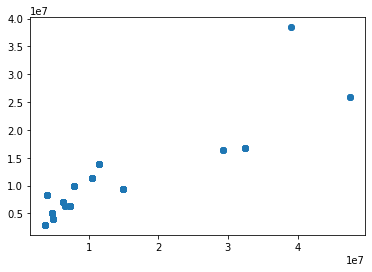

In [22]:
plt.scatter(y_test,y_predict)

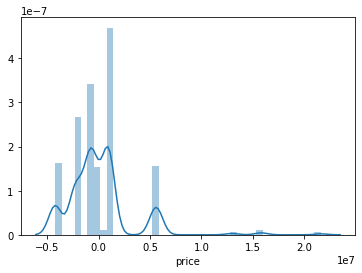

In [23]:
sb.distplot(y_test-y_predict) # Its a histogram of residuals which is normal distribution. therefore our modelis correct choice for data set